In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [8]:
state_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
state_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-133.65582 55.62562, -133.6249..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.79968 32.59362, -114.80939 32.6..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777 41.10070, -73.69595 41.115..."


In [9]:
county_df = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,04,015,00025445,0500000US04015,04015,Mohave,06,34475567011,387344307,"POLYGON ((-114.75562 36.08717, -114.75364 36.0..."
1,12,035,00308547,0500000US12035,12035,Flagler,06,1257365642,221047161,"POLYGON ((-81.52366 29.62243, -81.32406 29.625..."
2,20,129,00485135,0500000US20129,20129,Morton,06,1889993251,507796,"POLYGON ((-102.04195 37.02474, -102.04195 37.0..."
3,28,093,00695770,0500000US28093,28093,Marshall,06,1828989833,9195190,"POLYGON ((-89.72432 34.99521, -89.64428 34.995..."
4,29,510,00767557,0500000US29510,29510,St. Louis,25,160458044,10670040,"POLYGON ((-90.31821 38.60002, -90.30183 38.655..."


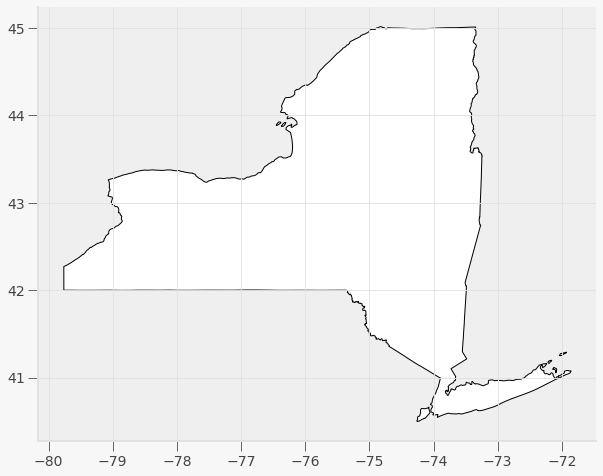

In [11]:
fig, gax = plt.subplots(figsize=(10, 10))
state_df.query("NAME == 'New York'").plot(ax=gax, edgecolor="black", color="white")
plt.show()

In [20]:
#loading school district files

zipfile = "zip:///Users/nicoleshi/Desktop/eco225 files/ECO225 Project/Data/School Districts.zip"
school_district = gpd.read_file(zipfile)
school_district.head(10)

,school_dis,shape_area,shape_leng,geometry
0,32.0,5.189850e+07,37251.057496,"POLYGON ((-73.91181 40.70343, -73.91290 40.702..."
1,16.0,4.676362e+07,35848.904343,"POLYGON ((-73.93312 40.69579, -73.93237 40.695..."
2,7.0,9.225858e+07,65300.498249,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,28.0,2.475655e+08,114699.995616,"POLYGON ((-73.84485 40.73575, -73.84480 40.735..."
4,18.0,1.751929e+08,120924.900794,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
5,21.0,2.101924e+08,123879.443088,"POLYGON ((-73.96185 40.62757, -73.96139 40.625..."
6,10.0,2.825405e+08,94957.400494,"POLYGON ((-73.86790 40.90294, -73.86796 40.902..."
7,26.0,4.243015e+08,131618.735747,"MULTIPOLYGON (((-73.74461 40.77895, -73.74429 ..."
8,29.0,4.201978e+08,135060.741215,"POLYGON ((-73.73816 40.72896, -73.73716 40.728..."
9,5.0,5.251833e+07,44503.250386,"POLYGON ((-73.93516 40.83268, -73.93513 40.832..."


In [18]:
print(school_district.columns)

Index(['school_dis', 'shape_area', 'shape_leng', 'geometry'], dtype='object')


In [33]:
#data cleaning
school_district["school_dis"] = school_district["school_dis"].apply(int)
school_district.head()

,school_dis,shape_area,shape_leng,geometry
0,32,5.189850e+07,37251.057496,"POLYGON ((-73.91181 40.70343, -73.91290 40.702..."
1,16,4.676362e+07,35848.904343,"POLYGON ((-73.93312 40.69579, -73.93237 40.695..."
2,7,9.225858e+07,65300.498249,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,28,2.475655e+08,114699.995616,"POLYGON ((-73.84485 40.73575, -73.84480 40.735..."
4,18,1.751929e+08,120924.900794,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."


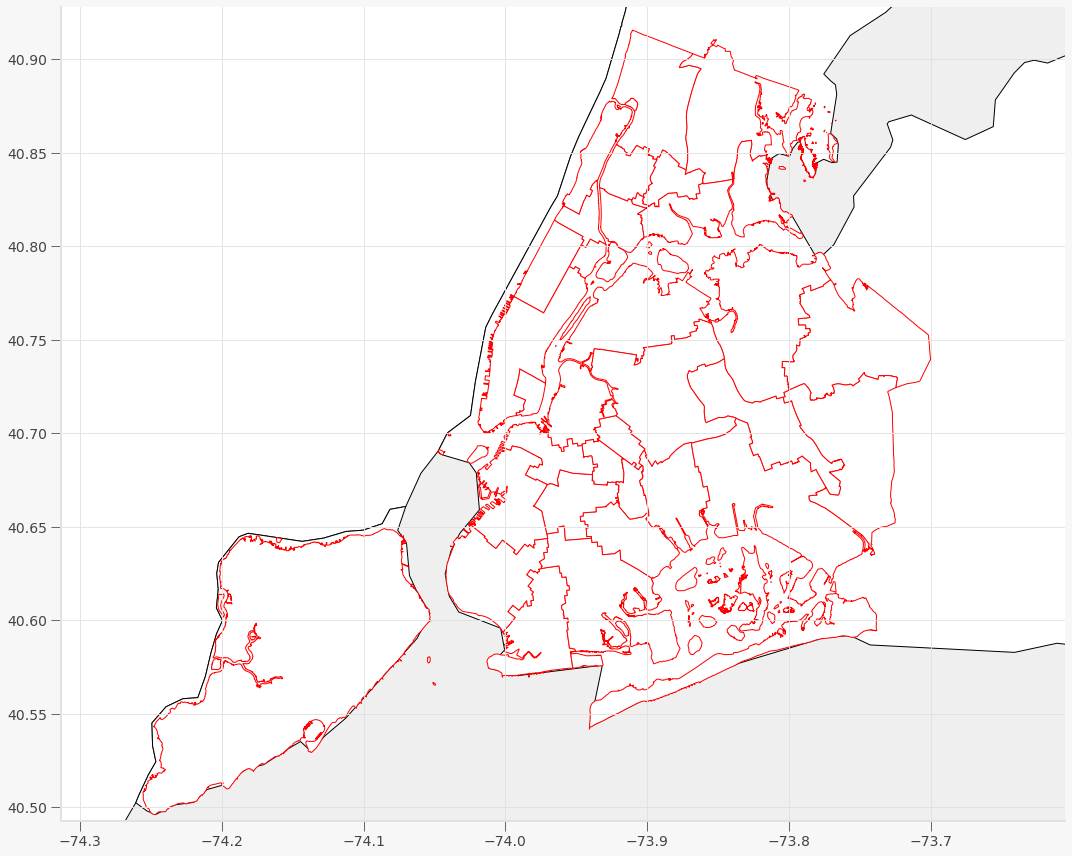

In [42]:
fig, gax = plt.subplots(figsize=(18, 18))
state_df.plot(ax=gax, edgecolor="black", color="white")
school_district.plot(ax=gax, edgecolor="red", color="white")
plt.ylim([40.492507, 40.928088])
plt.xlim([-74.313573, -73.605205]) #boundary box of NYC State Districts
plt.show()


